In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.rcParams['figure.dpi'] =200
plt.rcParams['figure.figsize']=(15,3)

In [2]:
cd drive/MyDrive/Project1/

/content/drive/MyDrive/Project1


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
# load dataset
data = pd.read_csv('Customer_Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.shape


(10000, 14)

In [8]:
# drop unnecessary columns
data.drop(['RowNumber','CustomerId','Surname'], axis =1,inplace=True)

In [9]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Exploratory Data Analysis

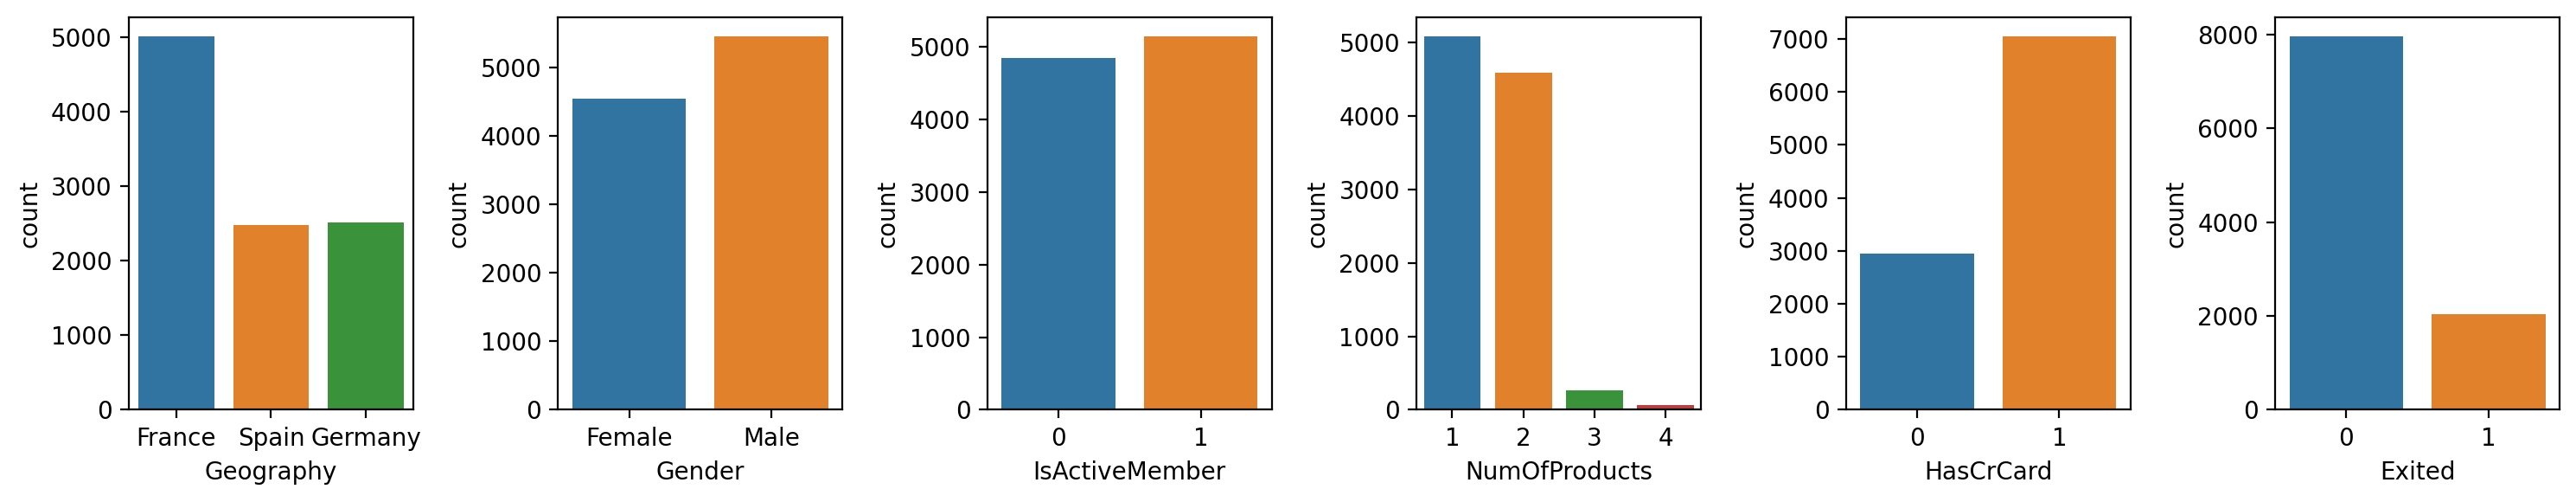

In [ ]:

fig, ax = plt.subplots(1,6)
sns.countplot(data['Geography'], ax=ax[0])
sns.countplot(data['Gender'], ax=ax[1])
sns.countplot(data['Exited'], ax=ax[5])
sns.countplot(data['NumOfProducts'], ax=ax[3])
sns.countplot(data['HasCrCard'], ax=ax[4])
sns.countplot(data['IsActiveMember'], ax=ax[2])
plt.tight_layout()

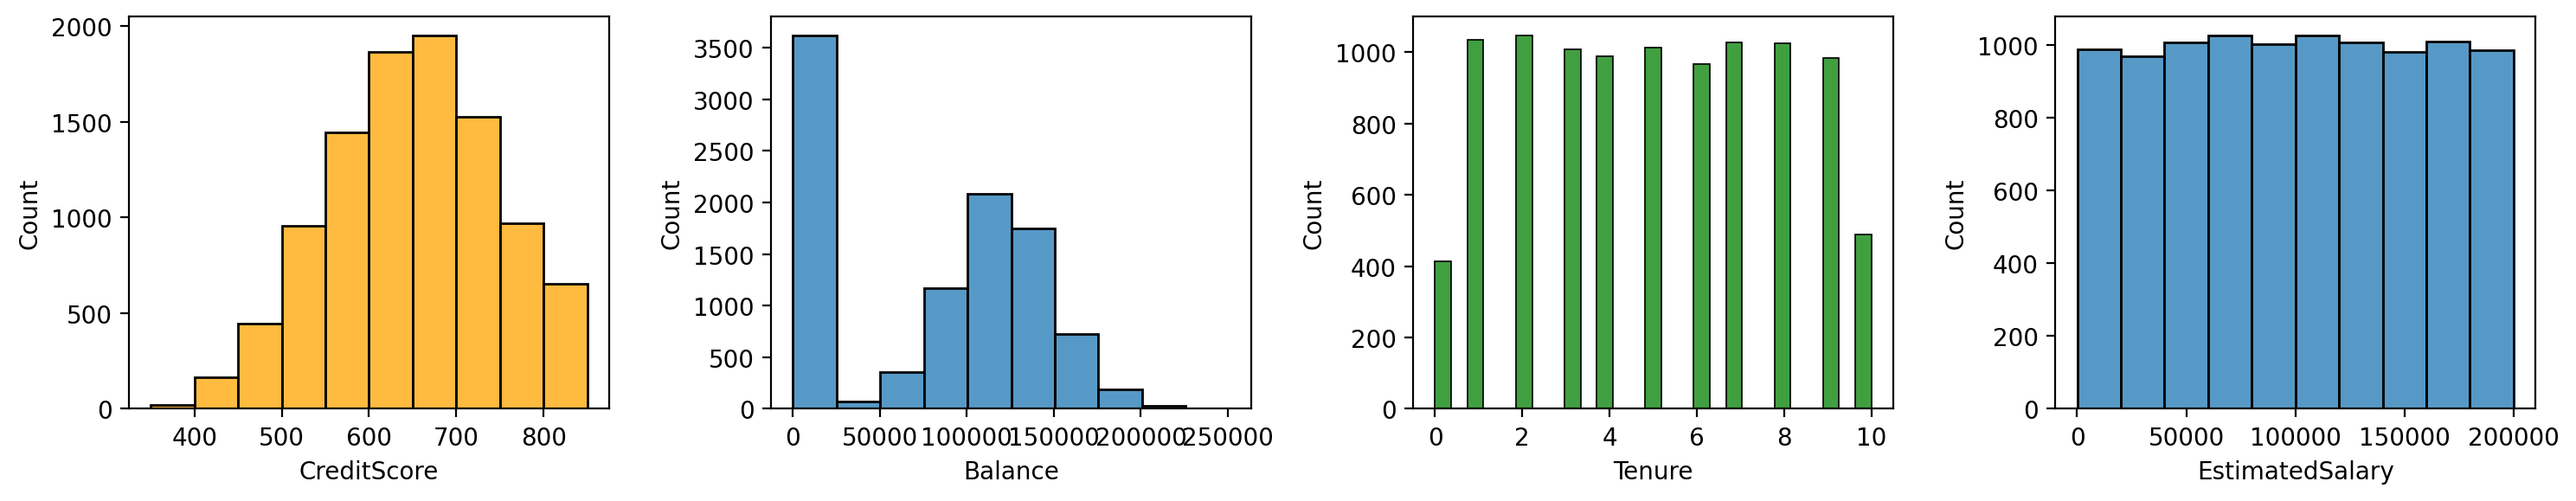

In [ ]:
fig, ax = plt.subplots(1,4)
sns.histplot(data['CreditScore'],bins=10, ax=ax[0],color='orange')
sns.histplot(data['Balance'],bins=10, ax=ax[1])
sns.histplot(data['Tenure'], ax=ax[2],color ='green')
sns.histplot(data['EstimatedSalary'],bins=10, ax=ax[3])
plt.tight_layout()

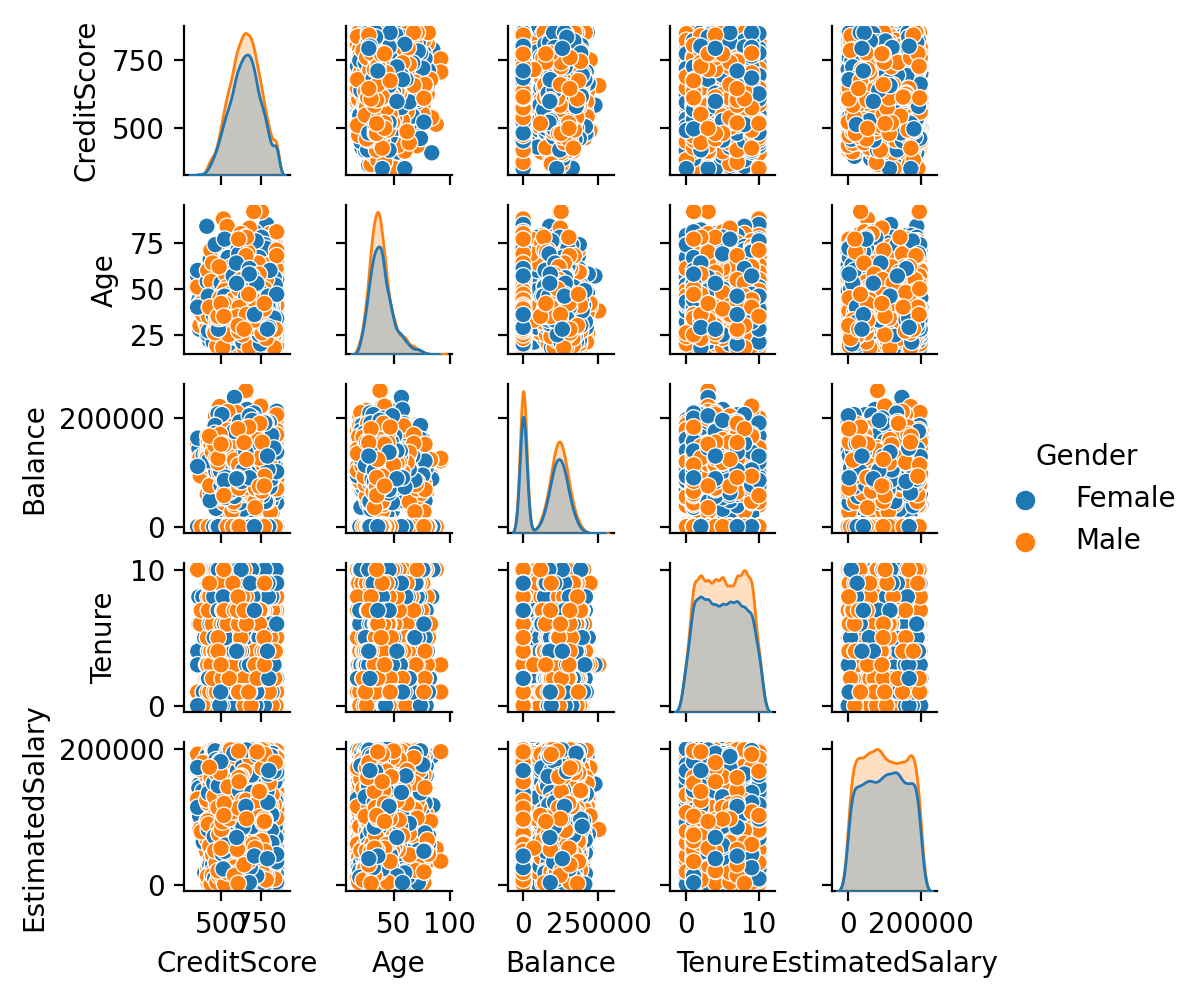

In [ ]:

sns.pairplot(data,vars=['CreditScore','Age','Balance','Tenure','EstimatedSalary'],hue='Gender',height=1)

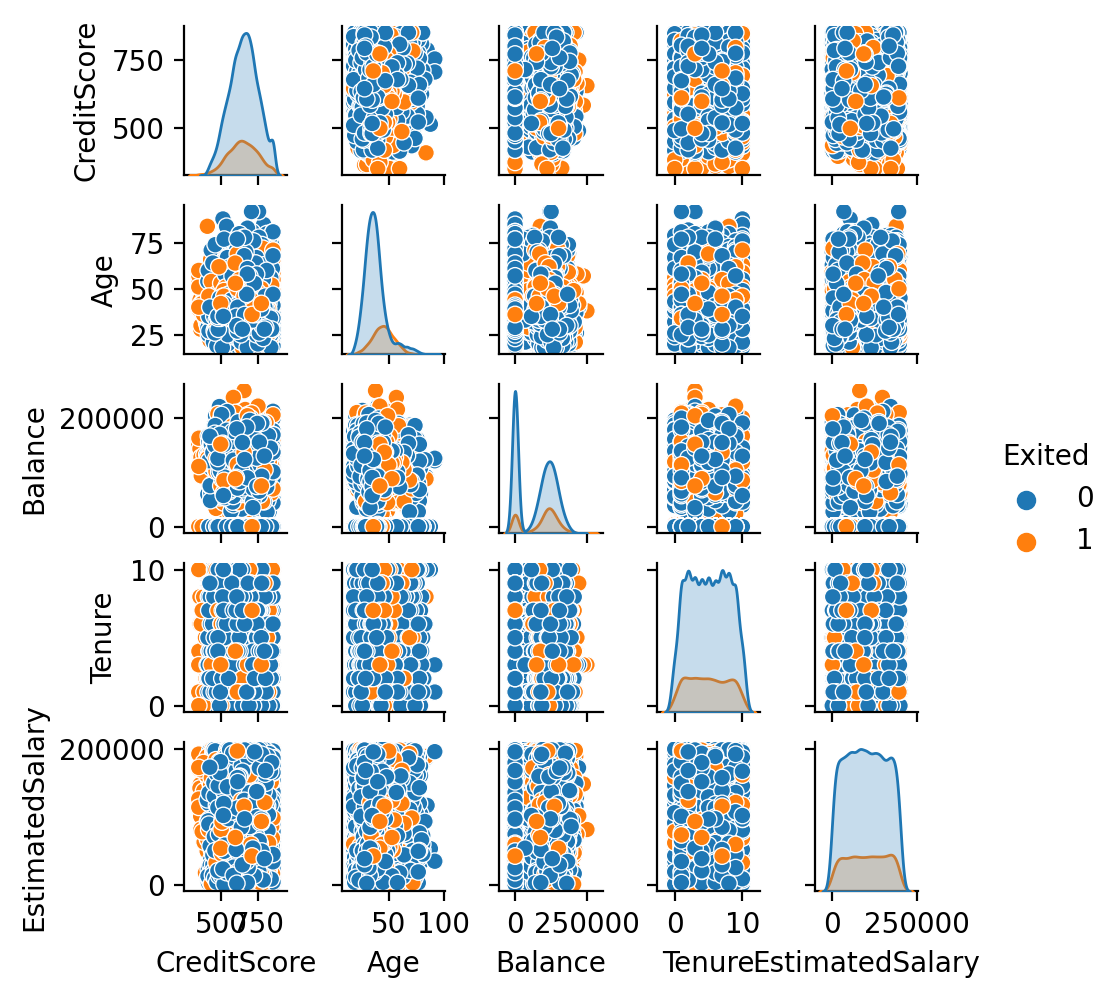

In [ ]:

sns.pairplot(data,vars=['CreditScore','Age','Balance','Tenure','EstimatedSalary'],hue='Exited',height=1)

# Data Preprocessing

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [204]:
X = data.iloc[:,:-1] # features
y= data.iloc[:,-1] # target

In [205]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [206]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [207]:
# convert categorical data into numerical
X_onehot = pd.get_dummies(X, drop_first=True)

In [208]:
X_onehot.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [209]:
# split the data into train and test sets
x_train,x_test, y_train,y_test = train_test_split(X_onehot, y, test_size=0.2,random_state=42,stratify=y)

In [210]:
# scale the X feature
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

# Build Neural Network Model

In [65]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense,InputLayer

from tensorflow.keras.optimizers import Adam

In [211]:
input_shape =x_train_scaled.shape[1:]

In [212]:
class_weight = y.value_counts().to_dict()
class_weight

{0: 7963, 1: 2037}

In [213]:
total_sample = sum(class_weight.values())
total_sample

10000

In [214]:
class_weight = [total_sample/(len(class_weight)*class_weight[0]),total_sample/(len(class_weight)*class_weight[1])]
class_weight

[0.6279040562602034, 2.454590083456063]

In [215]:
# model building
model = Sequential()
model.add(InputLayer(input_shape))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [216]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1536      
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18177 (71.00 KB)
Trainable params: 18177 (71.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [217]:
# compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [218]:
class_weight = {0:0.6279040562602034, 1:2.454590083456063}

In [228]:
# model fitting
history = model.fit(x_train_scaled,y_train,batch_size=32, epochs=10, class_weight=class_weight,validation_split=0.1)

Epoch 1/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4453 - accuracy: 0.7990 - val_loss: 0.4398 - val_accuracy: 0.7937
Epoch 2/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.8035 - val_loss: 0.4343 - val_accuracy: 0.8000
Epoch 3/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4412 - accuracy: 0.8026 - val_loss: 0.4042 - val_accuracy: 0.8175
Epoch 4/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4403 - accuracy: 0.8024 - val_loss: 0.4493 - val_accuracy: 0.7800
Epoch 5/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4363 - accuracy: 0.8014 - val_loss: 0.4274 - val_accuracy: 0.8012
Epoch 6/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4362 - accuracy: 0.8051 - val_loss: 0.3993 - val_accuracy: 0.8175
Epoch 7/10
225/225 [==============================] - 1s 3ms/step - loss: 0.4335 - accuracy: 0.8069 - val_loss: 0.4231 - val_accuracy: 0.8037
Epoch 

In [229]:
hist = pd.DataFrame(history.history)

In [230]:
hist

,loss,accuracy,val_loss,val_accuracy
0,0.445312,0.799028,0.439807,0.79375
1,0.442312,0.803472,0.434336,0.80000
2,0.441197,0.802639,0.404187,0.81750
3,0.440278,0.802361,0.449251,0.78000
4,0.436314,0.801389,0.427418,0.80125
5,0.436221,0.805139,0.399340,0.81750
6,0.433546,0.806944,0.423122,0.80375
7,0.433634,0.802083,0.423278,0.80000
8,0.430157,0.809306,0.403813,0.80500
9,0.430890,0.806250,0.426122,0.79875


<Axes: >

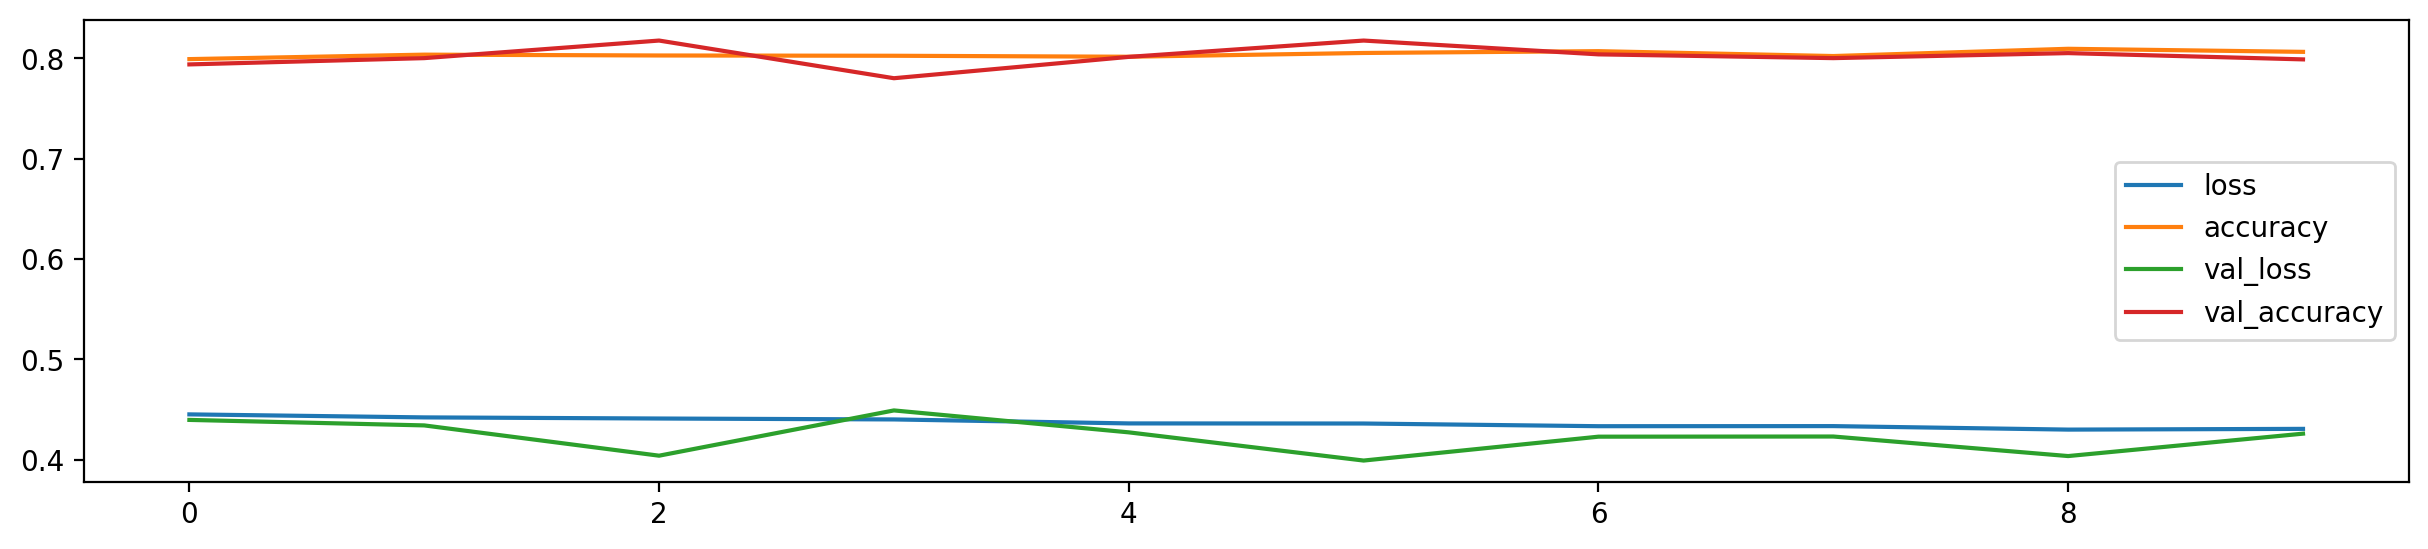

In [231]:
hist.plot()

# Model Validation

In [232]:
from sklearn.metrics import classification_report

In [233]:
y_pred = model.predict(x_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [234]:
y_pred = (y_pred>0.5).astype('int')

In [235]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.49      0.75      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.79      0.81      2000



# Model Saving and Loading

In [137]:
import pickle
import os

In [97]:
os.makedirs('model', exist_ok=True)

In [236]:
model.save('model/churn_model1.h5')

In [237]:
pickle.dump(scale, open('model/scale.pkl','wb'))

In [238]:
# load the model
model1 = keras.models.load_model('model/churn_model1.h5')
scaler1 = pickle.load(open('model/scale.pkl','rb'))

In [104]:
X_onehot.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [249]:
# testing model
test=[[850.0, 35.0, 2.0, 0.0, 1.0, 1.0, 1.0, 79084.1, 0.0, 1.0, 1]]

In [250]:
T = scale.transform(test)
T

array([[ 2.06280864, -0.37493284, -1.04143297, -1.22605881, -0.91025649,
         0.64104192,  0.97067965, -0.36012837, -0.57831252,  1.73089688,
         0.90750738]])

In [251]:
(model1.predict(T)>0.5).astype('int')

1/1 [==============================] - 0s 20ms/step


array([[0]])